# step:- 1 | Set the default componets (accuracy, loss,optimizer) and default settings(traing data source, validation data source, training batch size and validation batch size)
In my case it is deep Fake detection problem, so accuracy function is ***Binary Accuracy***, I have used `torchmetrics`  with the name `BinAcc`, but you can define your own inside the `Libs/accuracies.py` and can change the name of the function.

Here loss function is ***Binary Cross Entropy***, I have used `torch.nn.BCE` inside `Libs/losses.py` with the name `BCE`.

Here i take ***Adam*** optimizer ,i have defined inside `Libs/optimizers.py` with the name `OptAdam`.

## saving the default configurations
prepare a variable like
```python
dconfig = {
    "accuracy_loc": "BinAcc",
    "loss_loc": "BCE",
    "optimizer_loc": "OptAdam",
    "train_data_src": "../DataSet/real_vs_fake/real_vs_fake/train/",
    "valid_data_src": "../DataSet/real_vs_fake/real_vs_fake/valid/",
    "train_batch_size": 32,
    "valid_batch_size": 24
}
```
- **Note:** the values of `"accuracy_loc"`,`"loss_loc"` and `"optimizer_loc"` should be the as same as the names of functions defined inside `Libs/accuracies.py`, `Libs/losses.py` and `Libs/optimizers.py` respectively.
- **Note:** the values of `train_data_src` and `"valid_data_src"` should be the correct file/folder path that should be proccessed by the `Dataset` classes which you have to design in `modeling.ipynb`
And then use 
```python
set_default_config(data=dconfig)
```


In [2]:
from PyTorchLabFlow import set_default_config
#set these for thwe first time, you can change this configuration latter also. it fixes the default configurations
dconfig = {
    "accuracy_loc": "BinAcc",
    "loss_loc": "BCE",
    "optimizer_loc": "OptAdam",
    "train_data_src": "../DataSet/real_vs_fake/real_vs_fake/train/",
    "valid_data_src": "../DataSet/real_vs_fake/real_vs_fake/valid/",
    "train_batch_size": 32,
    "valid_batch_size": 24
}
set_default_config(data=dconfig)

It will save these configurations inside `internal/default_Config.json` so that everytime you make a new experiment you dont have to assign those again and again, however you can change these configuration at the time of creating new experiment but make sure the avobe ***Note***

## Now it is time to create a new jupyter file and name it as modelling. And follow the steps that i have covered in `Modeling.ipynb`
# After reading the steps we will come to this file again to train a experiment

     .............................................................
     .............................................................
     .............................................................
     .............................................................

# Step:- 3 | Training and experiment
Here you have to give each experiment a unique name so that you can access that experiment by their name
call `train_new` with parameters `name`, `model_loc` and `dataset_loc`
- **Note:** `name` should be unique for each experiment.
- **Note:** `model_loc` should be the same string as the recently pasted model class's name.
- **Note:** `model_loc` should be the same string as the recently pasted datset class's name.


In [3]:
from PyTorchLabFlow import train_new
P = train_new(name="exp01",model_loc="testCNN",dataset_loc="DS01",prepare=True)
P.train(num_epochs=2)

Configuration file is saved at internal/Configs/exp01.json
History will be saved at internal/Histories/exp01.csv
Weights will be saved at internal/Weights/exp01.pth
Data loaders are successfully created


Epoch 1/2: 100%|█| 3125/3125 [06:06<00:00,  8.52it/s, accuracy=0.589, loss=0.65


Epoch 1, Train Loss: 0.6548, Train Accuracy: 0.59, Val Loss: 0.5941, Val Accuracy: 0.74
Best Model Weights Updated: Epoch 1 - Val Loss: 0.5940663305689676


Epoch 2/2: 100%|█| 3125/3125 [04:10<00:00, 12.46it/s, accuracy=0.653, loss=0.60
                                                                               

Epoch 2, Train Loss: 0.6015, Train Accuracy: 0.65, Val Loss: 0.5483, Val Accuracy: 0.78
Best Model Weights Updated: Epoch 2 - Val Loss: 0.5483206537701815
Finished Training


# Step:- 4 | Observing Performance
Call `performance_plot` to observe performance of all/specific experiments at once

new Pipeline initialized : exp01 with last_epoch:2 and best_val_accuracy:0.7766786555020357


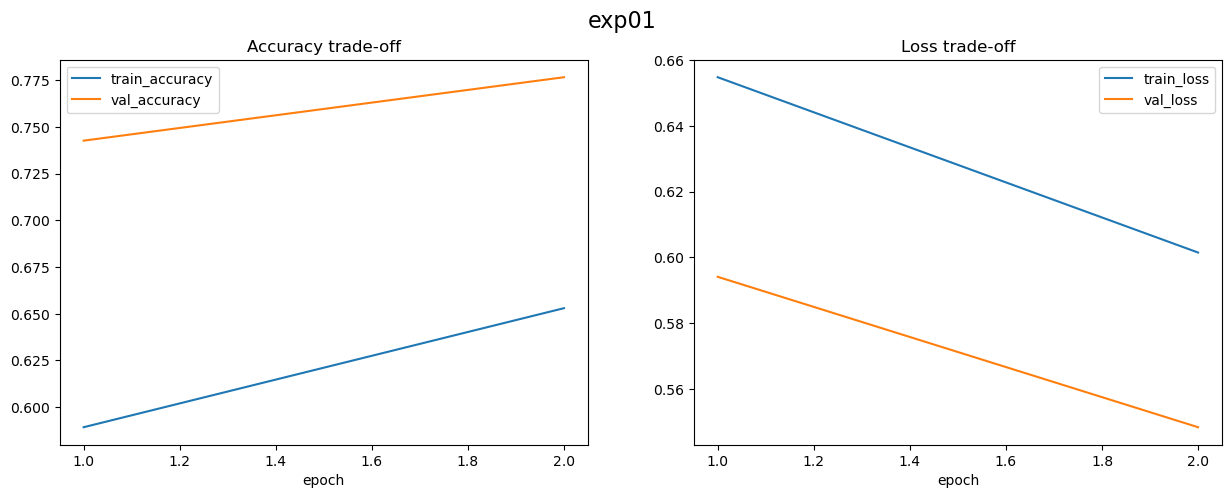

In [4]:
from PyTorchLabFlow import performance_plot
performance_plot()

#### Step:- 1 and Step:- 2 will be repeated as per performance, in this manner you have to make multiple model class, dataset classes and train them giving a new experiment name to these.

##### After some cycles of step 2 and 3, you will get to know that some experiments are very very  bad so you have to delete these or move to different place such that for this use `archive` function reffer to `readme` file.
##### And some experiments will performe well so if you have a different system like your powerfull desktop or you college lab workstation, then use `transfer` function reffer to `readme` file


### **Note:**
##### - Here we have different files for different types of components, inside a file same type of components should be named uniquely